In [7]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

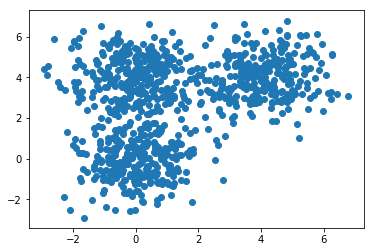

In [31]:
dimension = 2
coordinate = 4
center_1 = np.array([0, 0])
center_2 = np.array([coordinate, coordinate])
center_3 = np.array([0, coordinate])

num_points = 900
X = np.zeros((num_points, dimension))
X[:300, :] = np.random.randn(300, dimension) + center_1
X[300:600, :] = np.random.randn(300, dimension) + center_2
X[600:, :] = np.random.randn(300, dimension) + center_3

plt.scatter(X[:, 0], X[:, 1])

In [72]:
def euclidean_distance(u, v):
    return np.linalg.norm(u - v)

def cost_function(X, prob_matrix, cluster_matrix):
    total_cost = 0
    
    for k in range(len(cluster_matrix)):
        for n in range(len(X)):
            total_cost += prob_matrix[n, k] * euclidean_distance(cluster_matrix[k], X[n])
    return total_cost
    
def plot_k_means(X, num_clusters, max_iter=20, beta=1.0):
    num_rows, num_dimension = X.shape
    cluster_matrix = np.zeros((num_clusters, dimension))
    prob_matrix = np.zeros((num_rows, num_clusters))
    
    # Initialize cluster_matrix to choose random points
    for i in range(num_clusters):
        cluster_matrix[i] = X[np.random.choice(num_rows)]
    
    grid_width = 5
    grid_height = max_iter / grid_width
    random_colors = np.random.random((num_clusters, 3))
    plt.figure()
    
    training_costs = np.zeros(max_iter)
    
    # Soft K-Means
    for i in range(max_iter):
        colors = prob_matrix.dot(random_colors)
        plt.subplot(grid_width, grid_height, i + 1)
        plt.scatter(X[:, 0], X[:, 1], c=colors)
        
        for k in range(num_clusters):
            for n in range(num_rows):
                # Soft-max to determine the probability of the point belonging to each cluster
                current_cluster_prob = np.exp(-beta * euclidean_distance(cluster_matrix[k], X[n]))
                total_cluster_prob = np.sum(np.exp(-beta * euclidean_distance(cluster_matrix[j], X[n])) for j in range(num_clusters))
                prob_matrix[n, k] = current_cluster_prob / total_cluster_prob
        
        for k in range(num_clusters):
            cluster_matrix[k] = prob_matrix[:, k].dot(X) / prob_matrix[:, k].sum()
        
        training_costs[i] = cost_function(X, prob_matrix, cluster_matrix)
        
        if i > 0:
            # Convergence check
            if np.abs(training_costs[i] - training_costs[i - 1]) < 0.1:
                break
    plt.show()
    plt.plot(training_costs)
    plt.title('Costs')
    plt.show()

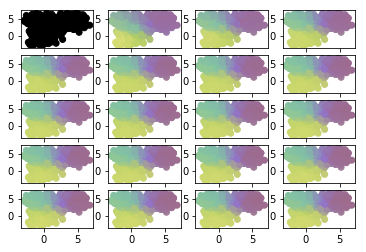

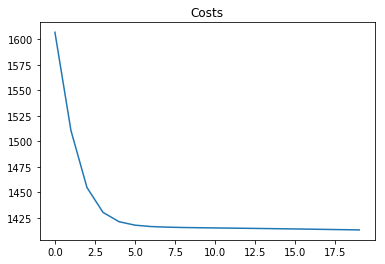

In [73]:
plot_k_means(X, 5)

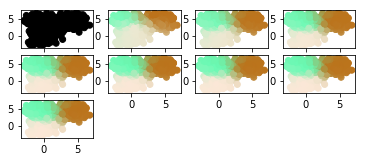

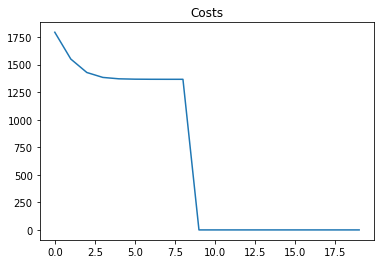

In [54]:
plot_k_means(X, 3)

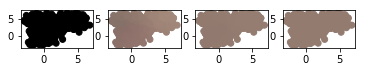

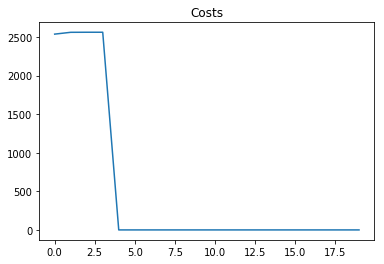

In [55]:
plot_k_means(X, 3, beta=0.1)

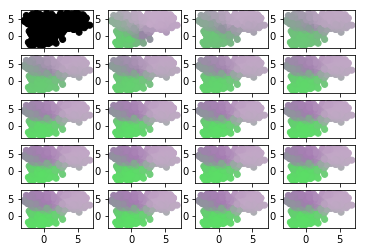

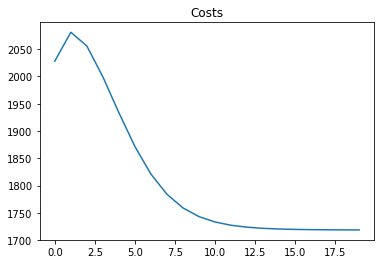

In [63]:
plot_k_means(X, 3, beta=0.75)

In [95]:
# K-means failure

def donut():
    num_rows = 1000
    dimension = 2
    
    r_inner = 5
    r_outer = 10
    
    r_1 = np.random.randn(num_rows // 2) + r_inner
    theta = 2 * np.pi * np.random.random(num_rows // 2)
    X_inner = np.concatenate([[r_1 * np.cos(theta)], [r_1 * np.sin(theta)]]).T
    
    r_2 = np.random.randn(num_rows // 2) + r_outer
    theta = 2 * np.pi * np.random.random(num_rows // 2)
    X_outer = np.concatenate([[r_2 * np.cos(theta)], [r_2 * np.sin(theta)]]).T
    
    return np.concatenate([X_inner, X_outer])

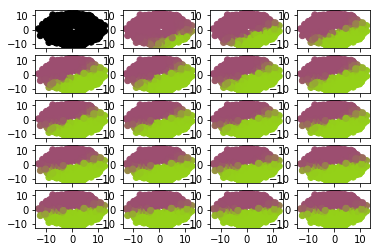

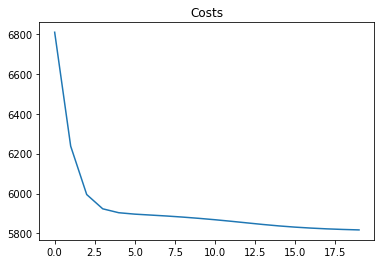

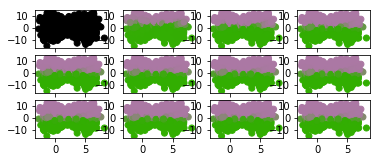

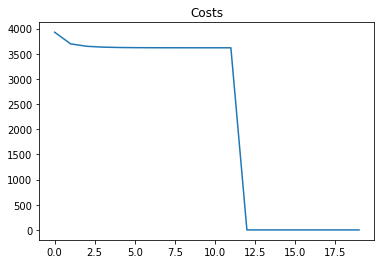

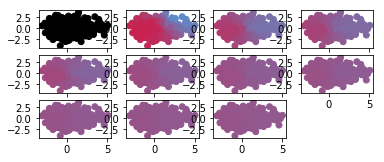

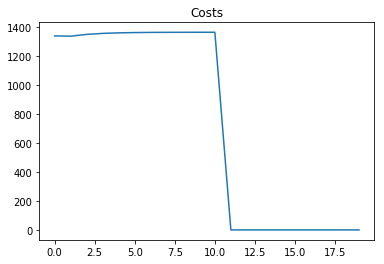

In [98]:
X = donut()
plot_k_means(X, 2)

X = np.zeros((1000, 2))
X[:500, :] = np.random.multivariate_normal([0, 0], [[1, 0], [0, 20]], 500)
X[500:, :] = np.random.multivariate_normal([5, 0], [[1, 0], [0, 20]], 500)
plot_k_means(X, 2)

X = np.zeros((1000, 2))
X[:950, :] = np.array([0, 0]) + np.random.randn(950, 2)
X[950:, :] = np.array([3, 0]) + np.random.randn(50, 2)
plot_k_means(X, 2)